In [9]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import spatial

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

#Read the pickle database to get the columns for the object descriptions

import pickle

with open('combo_cap_document_topics_with_likes.pickle', 'rb') as g:
   data1 = pickle.load(g)

df4=DataFrame(data1)
df4

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic,likes
0,0.00,0.00,0.32,0.00,0.00,0.00,0.66,0.00,0.00,0.00,6,8715
1,0.23,0.00,0.00,0.00,0.04,0.00,0.71,0.00,0.00,0.00,6,3458
2,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.00,0.75,9,8232
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.96,9,9371
4,0.00,0.70,0.00,0.00,0.00,0.00,0.25,0.03,0.00,0.00,1,6184
5,0.00,0.00,0.00,0.00,0.71,0.00,0.26,0.00,0.00,0.00,4,5798
6,0.00,0.00,0.00,0.23,0.00,0.00,0.00,0.00,0.74,0.00,8,13139
7,0.00,0.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,5068
8,0.58,0.00,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.26,0,3981
9,0.00,0.00,0.12,0.59,0.00,0.00,0.27,0.00,0.00,0.00,3,6435


In [10]:
y = df4.likes # make y = the likes (dependent variable)
x = df4[['Topic0', 'Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'dominant_topic']]


In [11]:
# create training and testing variables using the Scikit-Learn library and its train_test_split method
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [12]:
# MAKE A TRAININGA DN A TEST SET FOR THE INDEPENDENT VAIRABLES AND THE DEPENTEND VARIABLE (Y/LIKES)
#TRAIN = 554; TRAIN = 139
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((554, 11), (554,), (139, 11), (139,))

In [13]:
lm = linear_model.LinearRegression()

In [14]:
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [15]:
some_pred = predictions[0:15]
some_test = y_test[0:15]

-0.029997950085741465

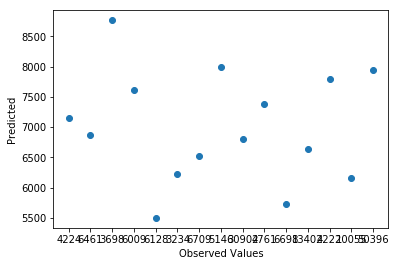

In [16]:
plt.scatter(some_test, some_pred)
plt.xlabel('Observed Values')
plt.ylabel('Predicted')
predictions[0:15]
y_test[0:15]

model.score(X_test, y_test)